In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression   
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.impute import SimpleImputer, KNNImputer
import warnings
warnings.filterwarnings('ignore')

In [10]:
import pandas as pd

df = pd.read_csv('dataset/convert_number_data_17.csv')


In [11]:
# drop curbWeight column
df = df.drop(['curbWeight'], axis=1)

In [12]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accelerationTime         26304 non-null  float64
 1   bodyType                 26304 non-null  int64  
 2   brand                    26304 non-null  int64  
 3   cargoVolume              26304 non-null  float64
 4   driveWheelConfiguration  26304 non-null  int64  
 5   eLabel                   26304 non-null  int64  
 6   emissionsCO2             26304 non-null  float64
 7   engineCapacity           26304 non-null  float64
 8   fuelCapacity             26304 non-null  float64
 9   fuelConsumption          26304 non-null  float64
 10  height                   26304 non-null  float64
 11  length                   26304 non-null  float64
 12  model                    26304 non-null  int64  
 13  modelDate                26304 non-null  int64  
 14  numberOfDoors         

In [13]:
# df = df.drop(['curbWeight', 'vEengineDisplacement'], axis=1)
df['vEengineDisplacement'].value_counts()

vEengineDisplacement
1598.0    2141
1998.0    1387
1968.0    1212
1995.0    1123
1984.0     873
          ... 
796.0        1
2950.0       1
2736.0       1
2765.0       1
2399.0       1
Name: count, Length: 292, dtype: int64

In [14]:
df.isna().sum()

accelerationTime           0
bodyType                   0
brand                      0
cargoVolume                0
driveWheelConfiguration    0
eLabel                     0
emissionsCO2               0
engineCapacity             0
fuelCapacity               0
fuelConsumption            0
height                     0
length                     0
model                      0
modelDate                  0
numberOfDoors              0
numberOfForwardGears       0
payload                    0
price                      0
roofLoad                   0
seatingCapacity            0
speed                      0
torque                     0
vEengineDisplacement       0
vEenginePower              0
vehicleTransmission        0
weightTotal                0
wheelbase                  0
width                      0
dtype: int64

In [15]:
# creating X and y variables
X = df.drop('price', axis=1)
# price column
y = np.log(df['price'])
# y = df['price']

In [16]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [17]:
# feature scale the X_train and X_test values

norm = StandardScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing data
X_test = norm.transform(X_test)

print(X_train)
print('\n')
print(X_test)

[[ 0.32145518  0.94524349 -0.15861321 ...  1.26919549 -0.0994536
   1.60347686]
 [ 1.80975926 -0.4399425   0.27343922 ... -0.81816958 -0.80713797
  -1.04255702]
 [-1.75433735  0.94524349  1.3535703  ...  1.59281798  1.21941272
   1.70359706]
 ...
 [ 0.43895287  0.77209524  0.12942175 ...  0.54104489  1.05857536
   0.38773157]
 [-0.69685814  0.77209524 -0.44664816 ...  0.39541476  0.22222111
   0.08737096]
 [-0.69685814  0.94524349  1.3535703  ...  1.43100674  0.897738
   1.11717874]]


[[ 0.1256257   0.59894699  1.28156156 ... -0.34891697  0.06138375
   0.34482291]
 [ 0.24312339  0.42579874  0.63348292 ... -1.2226977  -0.64630061
  -1.08546568]
 [-0.07020379 -1.65198025 -0.30263069 ... -0.44600372 -0.16378854
  -0.04135501]
 ...
 [-1.87183504 -0.4399425  -1.45477051 ...  1.31773887  1.88206262
   1.10287586]
 [-0.07020379 -0.4399425  -0.30263069 ...  0.00706777  0.28655605
   0.31621714]
 [ 2.08392054  1.11839174 -1.16673555 ...  0.07179227  0.70473318
   0.93124123]]


In [18]:
# Fitting linear regression
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [19]:
# fitting knn
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [20]:

rf = RandomForestRegressor(random_state = 123 , max_depth = 45 , n_estimators = 600)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=45, n_estimators=600, random_state=123)

In [21]:
# fit decision tree
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

TRAIN SCORE

In [22]:
train_score = pd.DataFrame({
    'model': ['LinearRegressor', 'KNeighborsRegressor', 'DecisionTree', 'RandomForestRegressor'],

    'score': [linear.score(X_train, y_train), knn.score(X_train, y_train), dtr.score(X_train, y_train), rf.score(X_train, y_train),
              ]
    })
train_score

,model,score
0,LinearRegressor,0.913983
1,KNeighborsRegressor,0.975258
2,DecisionTree,0.992206
3,RandomForestRegressor,0.990677


In [23]:
linear_pred = np.exp(linear.predict(X_test))
knn_pred = np.exp(knn.predict(X_test))

rf_pred = np.exp(rf.predict(X_test))
dtr_pred = np.exp(dtr.predict(X_test))

y_test = np.exp(y_test)

EVALUATION TEST

In [24]:
best_model = pd.DataFrame({
  'model': ['LinearRegressor', 'KNeighborsRegressor', 'DecisionTree', 'RandomForestRegressor'],
  'mae' : [mean_absolute_error(y_test, linear_pred), mean_absolute_error(y_test, knn_pred), mean_absolute_error(y_test, dtr_pred), mean_absolute_error(y_test, rf_pred)],
  'mse' : [mean_squared_error(y_test, linear_pred), mean_squared_error(y_test, knn_pred), mean_squared_error(y_test, dtr_pred), mean_squared_error(y_test, rf_pred)],
  'rmse' : [np.sqrt(mean_squared_error(y_test, linear_pred)), np.sqrt(mean_squared_error(y_test, knn_pred)), np.sqrt(mean_squared_error(y_test, dtr_pred)), np.sqrt(mean_squared_error(y_test, rf_pred))],
  'r2_score' : [r2_score(y_test, linear_pred), r2_score(y_test, knn_pred), r2_score(y_test, dtr_pred), r2_score(y_test, rf_pred)]
  
})
best_model

,model,mae,mse,rmse,r2_score
0,LinearRegressor,3.896228,35.390064,5.948955,0.876508
1,KNeighborsRegressor,2.574835,13.703141,3.701775,0.952183
2,DecisionTree,2.598872,13.823316,3.717972,0.951764
3,RandomForestRegressor,2.197082,9.484892,3.079755,0.966903


In [25]:
# cat boost regressor
for i in range(5):
    y = list(y_test)[i]
    y_pre = list(rf_pred)[i]
    print(f'Real price:    {y}')
    print(f'Predict price: {y_pre}\n\n')

Real price:    27.479999999999997
Predict price: 30.547750049038832


Real price:    15.189999999999998
Predict price: 16.480834336708153


Real price:    23.994999999999994
Predict price: 24.437557197714533


Real price:    41.219999999999985
Predict price: 40.84531090874506


Real price:    63.42000000000001
Predict price: 66.92155548887291




In [26]:
import matplotlib.pyplot as plt

In [27]:
def plot_result(y_pred, y_true, low=0, num=500, model=None):
    y_pred = y_pred[low:low+num]
    y_true = y_true[low:low+num]
    plt.figure(figsize=(16, 12), dpi=100)
    idx = np.array([_ for _ in range(len(y_true))])
    plt.plot(idx, y_true, label='TrueResult')
    plt.plot(idx, y_pred, label='Predict')
    plt.legend()
    if model is not None:
        plt.title(model)
    else:
        model = ""
    plt.show()
    plt.savefig(f'image/result_model_{model}.png', dpi=120)


In [28]:
# LGBMRegressor
plot_result(lgbm_pred, y_test, low=0, num=200, model='LGBMRegressor')

NameError: name 'lgbm_pred' is not defined

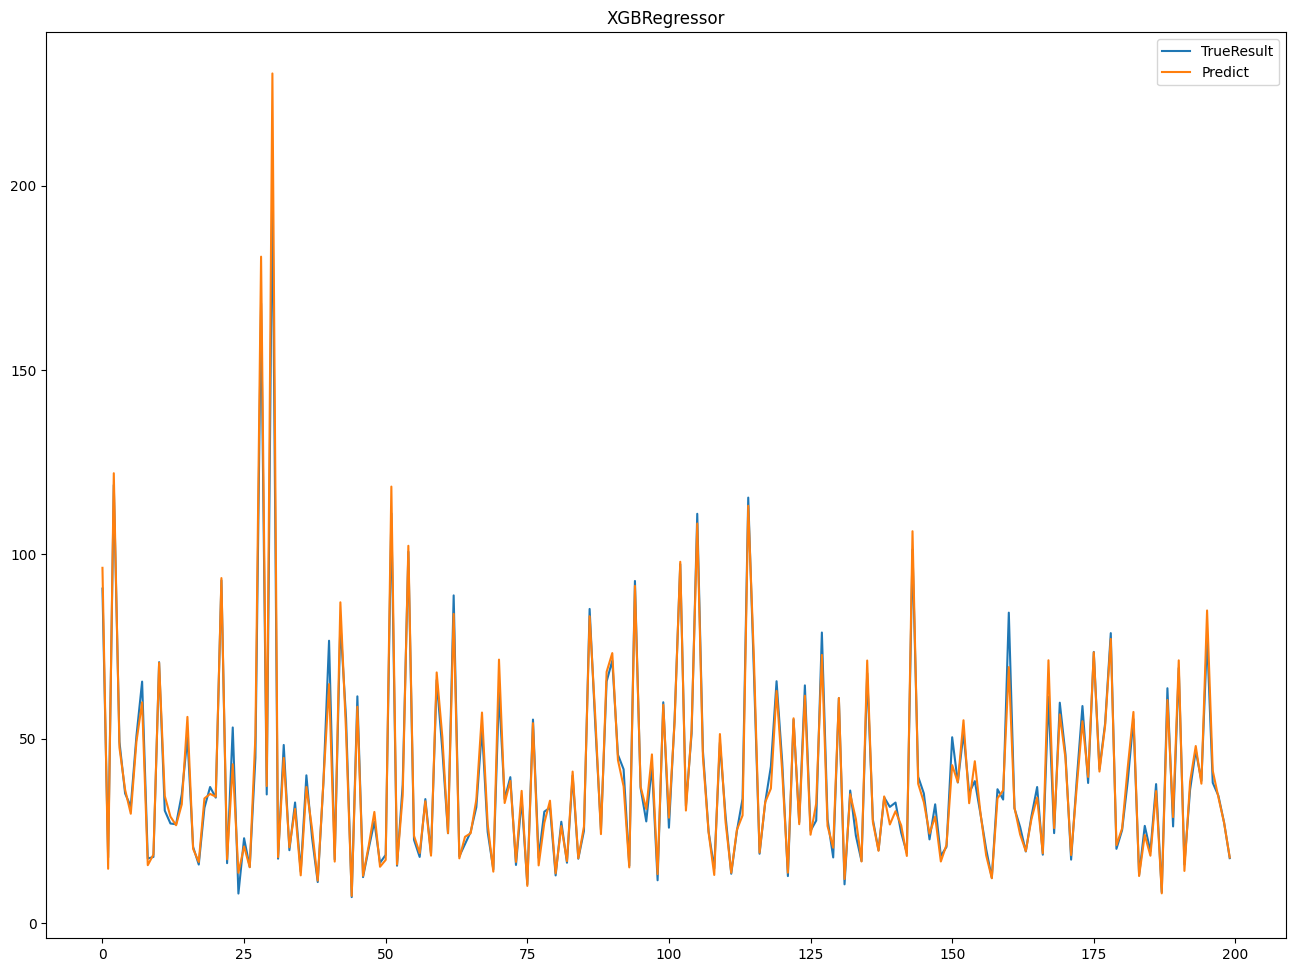

<Figure size 432x288 with 0 Axes>

In [ ]:
# ExtraTreesRegressor
plot_result(xgb_pred, y_test, low=0, num=200, model='XGBRegressor')

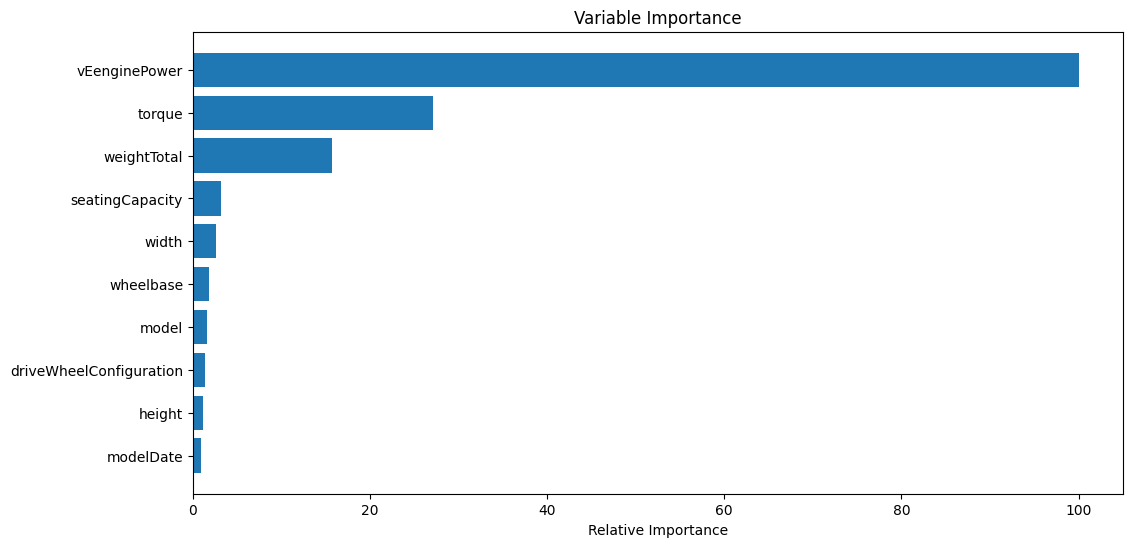

In [30]:
# fearure importance of decision tree regressor
feature_importance = dtr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[-10:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
feature_importance

array([6.11211571e-01, 7.95520564e-01, 2.78811651e-01, 5.52077982e-01,
       1.00000000e+02, 9.94138931e-01, 8.43657764e-02, 4.32635632e-01,
       7.25856280e-01, 8.22883530e-01, 5.48079583e-01, 9.04501373e-01,
       9.19368434e-01, 8.63598559e-01, 1.23712735e+00, 2.15127099e-02,
       7.21368383e-01, 4.78668012e-01, 2.61243367e-01, 2.82367408e+00,
       5.04772317e+00, 2.10522695e+01, 1.79313665e-01, 3.84214485e+01,
       3.35156420e-01, 2.03969316e+00, 3.83342149e-01, 1.38907809e+00])